In [1]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
#%load_ext rpy2.ipython

##ECS 171 FP
#1. Data proprocessing
goal:  split data into dataframe subset:

In [3]:
#load data from google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
#drive.mount('/content/gdrive')
path = '/gdrive/MyDrive/Colab Notebooks/chip_dataset.csv'
chip_dataset = pd.read_csv(path)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To have a brief overview of the dataset, we want to have a look of the head of the data frame and the maxium and minimum.

In [6]:
print(chip_dataset.head())
print(chip_dataset.min())
print(chip_dataset.max())

   Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2     28.0              NaN                    NaN      2600.0    Intel   
3     80.0            160.0                 1400.0      1800.0    Intel   
4    125.0            258.0                  758.0      3700.0  Unknown   

  Vendor  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0    AMD          NaN   

We notic that the release Date is in the form of yyyy-mm-dd form, to make it easier to discuss, we firstly transform it to the years from 2000-1-1 and replace it to the [years from 2000]

In [7]:
for i in range(1,len(chip_dataset)):
  if '#' in chip_dataset.iat[i-1,3] :
    chip_dataset.iat[i-1,3] = np.NaN
  if 'Na' in chip_dataset.iat[i-1,3] :
    chip_dataset.iat[i-1,3] = np.NaN
  else:
    year = int(chip_dataset.iat[i-1,3][0:4])-2000
    month = int(chip_dataset.iat[i-1,3][5:7])/12
    day = int(chip_dataset.iat[i-1,3][8:10])/365
    chip_dataset.iat[i-1,3] = year+ month + day


In [8]:
print(chip_dataset.head())

   Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU     7.221461               65.0   
1           1         AMD Athlon 200GE  CPU    18.766438               14.0   
2           2     Intel Core i5-1145G7  CPU    20.755479               10.0   
3           3    Intel Xeon E5-2603 v2  CPU     13.75274               22.0   
4           4  AMD Phenom II X4 980 BE  CPU    11.424886               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2     28.0              NaN                    NaN      2600.0    Intel   
3     80.0            160.0                 1400.0      1800.0    Intel   
4    125.0            258.0                  758.0      3700.0  Unknown   

  Vendor  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0    AMD          NaN   

#1.1 Data Spliting
First, the data is consisted with two main category :[CPU] and [GPU], and they are evaluate by different performance. We are trying to split the data into the two subset and discuss which factors are related to the chips performance and we are trying to distinguish the relationship between them.

In [9]:
grouped = chip_dataset.groupby(chip_dataset['Type'])
CPU = grouped.get_group('CPU')
del CPU['FP16 GFLOPS']
del CPU['FP32 GFLOPS']
del CPU['FP64 GFLOPS']
del CPU['Unnamed: 0']
GPU = grouped.get_group('GPU')
del GPU['Unnamed: 0']

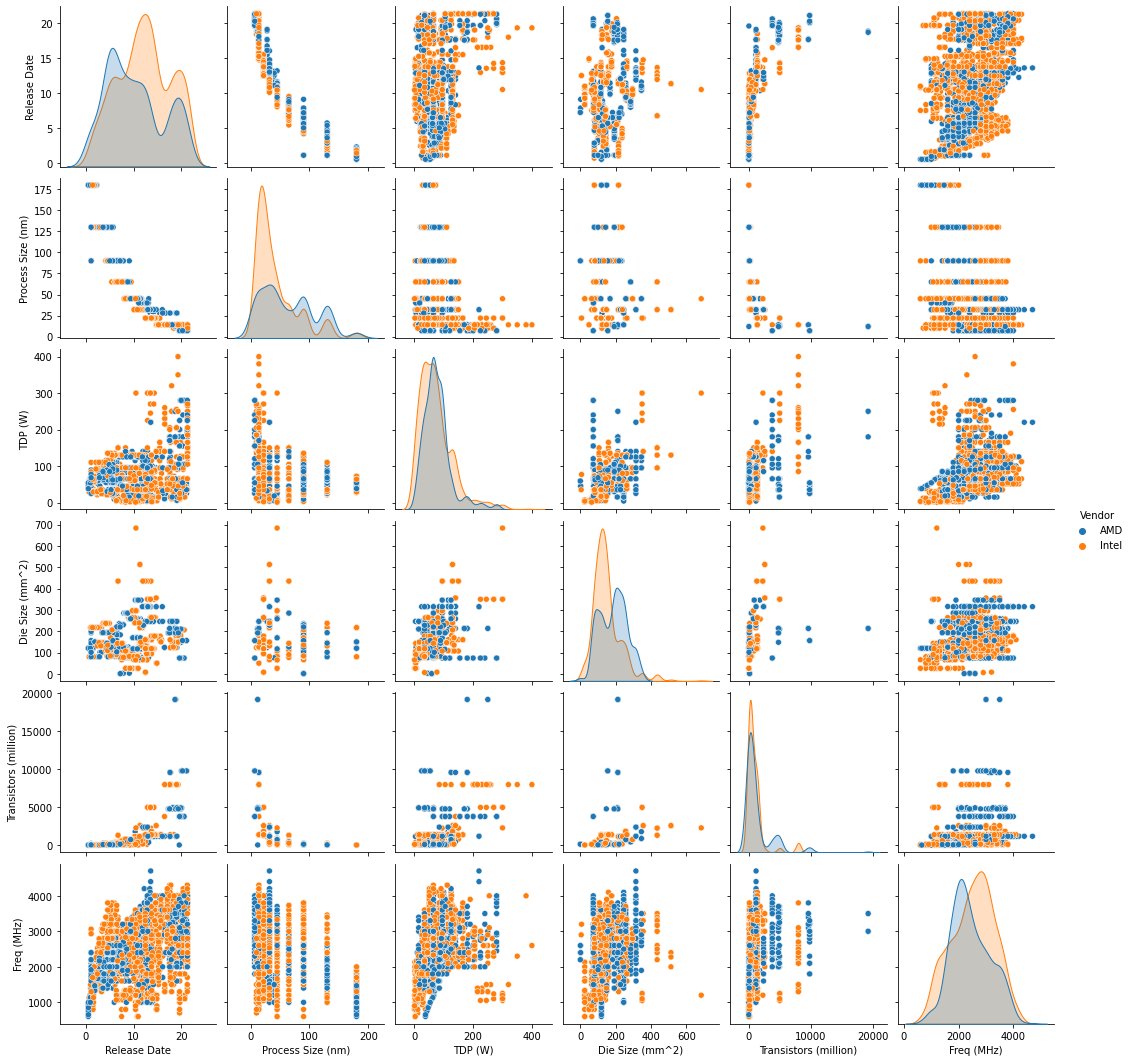

In [10]:
_ = sns.pairplot(CPU, hue='Vendor')

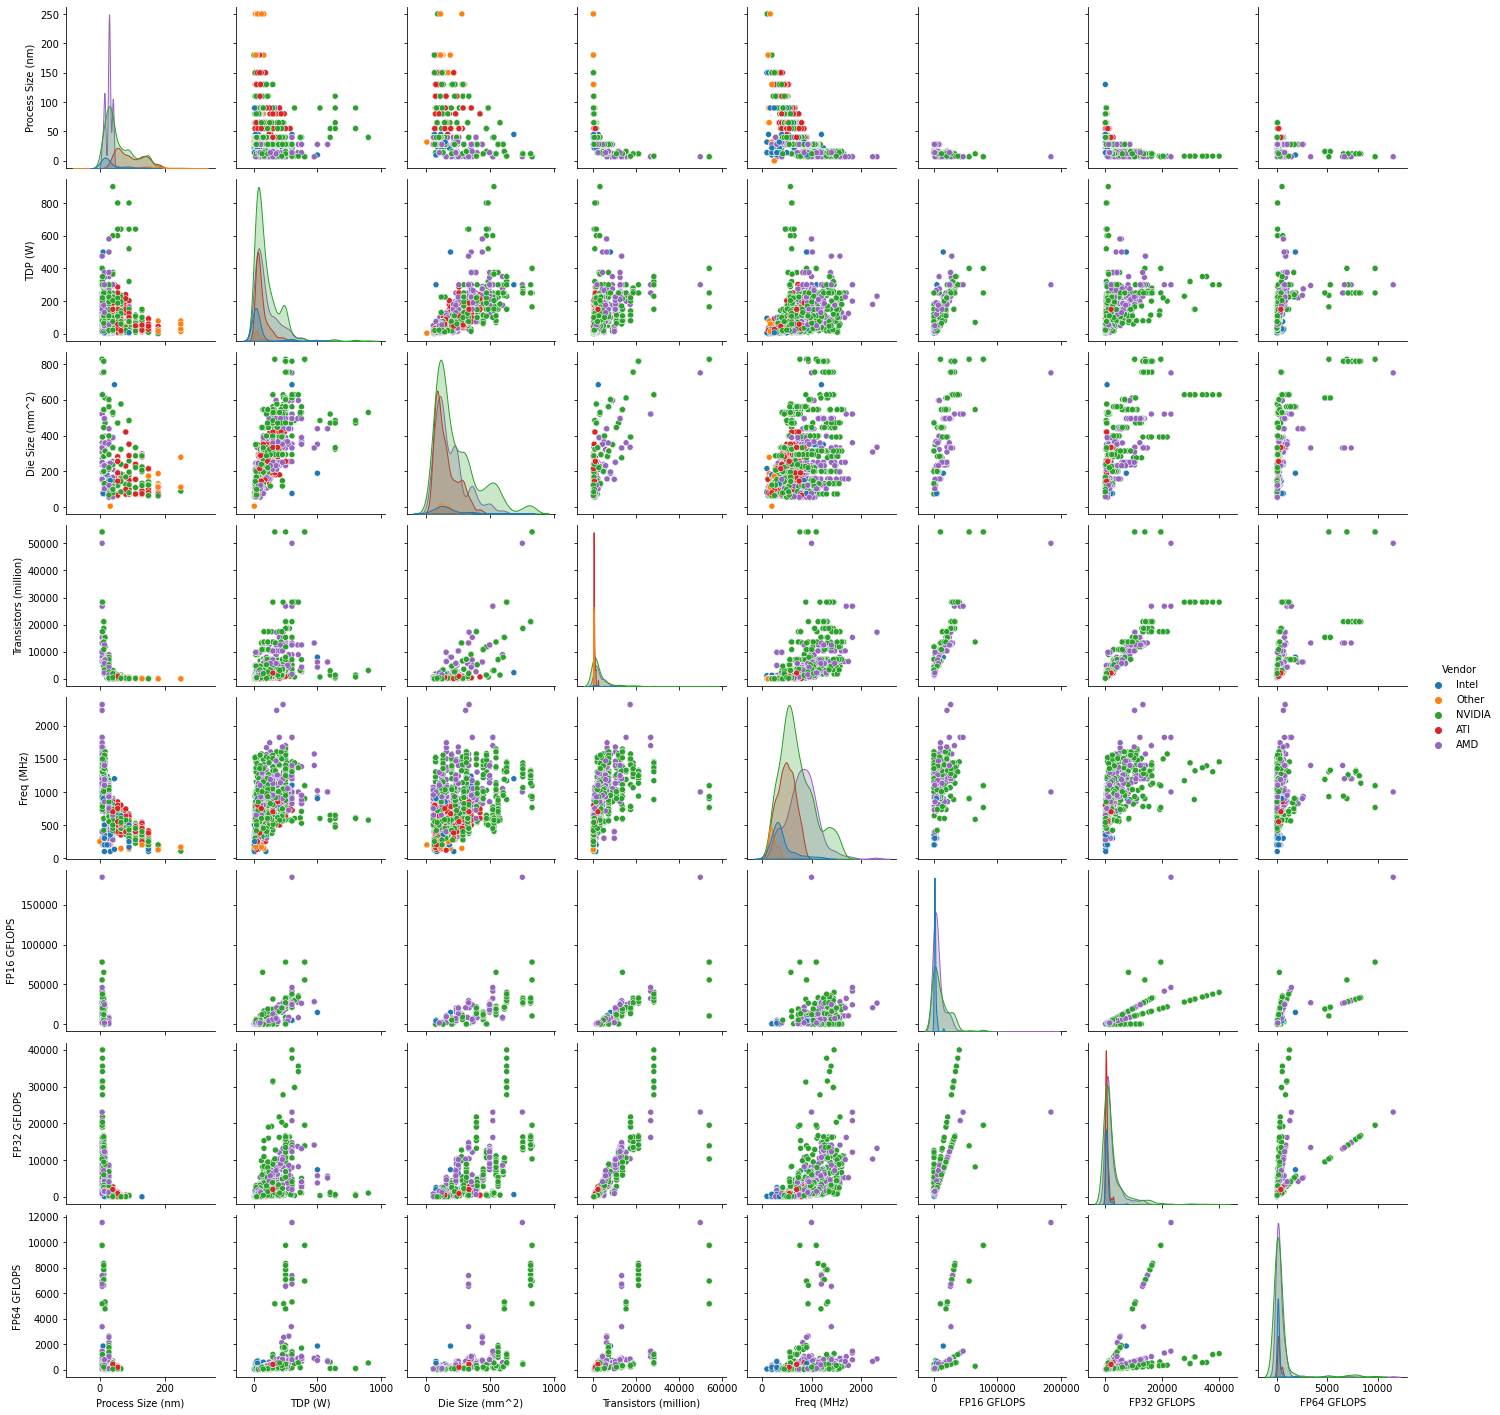

In [11]:
_ = sns.pairplot(GPU, hue='Vendor')

In [12]:
CPU_cor = CPU.copy().corr()
CPU_cor.style.format(precision = 3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
Process Size (nm),1.000,-0.119,-0.151,-0.513,-0.361
TDP (W),-0.119,1.000,0.411,0.432,0.333
Die Size (mm^2),-0.151,0.411,1.000,0.209,0.262
Transistors (million),-0.513,0.432,0.209,1.000,0.197
Freq (MHz),-0.361,0.333,0.262,0.197,1.000


In [13]:
GPU_cor = GPU.copy().corr()
GPU_cor.style.format(precision = 3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Process Size (nm),1.000,-0.199,-0.270,-0.412,-0.667,-0.369,-0.466,-0.216
TDP (W),-0.199,1.000,0.731,0.478,0.420,0.649,0.517,0.392
Die Size (mm^2),-0.270,0.731,1.000,0.694,0.378,0.692,0.653,0.558
Transistors (million),-0.412,0.478,0.694,1.000,0.527,0.810,0.862,0.685
Freq (MHz),-0.667,0.420,0.378,0.527,1.000,0.276,0.582,0.190
FP16 GFLOPS,-0.369,0.649,0.692,0.810,0.276,1.000,0.728,0.683
FP32 GFLOPS,-0.466,0.517,0.653,0.862,0.582,0.728,1.000,0.520
FP64 GFLOPS,-0.216,0.392,0.558,0.685,0.190,0.683,0.520,1.000
